In [1]:
# Nowcasting for price change predictions!
# Probably should set random seed at some point...
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
# Scale the lagged trade volumes ~ this may improve our scores
# Another attempt can come from hyperparameter selection 

In [2]:
# Model List:
m_list = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosted Tree', 'Persistent Model', 'KNN']
acc_l = []
auc_l = []
# Read in data ~ trust me its cleaned we're good to start
# We want to scale only the trade volume...
# Distinctly recall that we are only supposed to scale on training data ~ makes sense we don't technically have test data.
df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO481\Bone Prices\merged_bone_df_v2.csv')
# We must make the training and test split, keep in mind it is timeseries data so it won't be random
x_train = df[['Lagged Total Trade Volume', 'Lagged Price Change Indicator', 'Lagged Total Trade volume Substitute 1',
             'Lagged Price Change Indicator Substitute 1', 'Lagged Total Trade volume Substitute 2', 'Lagged Price Change Indicator Substitute 2',
             'Lagged Total Trade volume Substitute 3', 'Lagged Price Change Indicator Substitute 3', 'Lagged Total Trade volume Substitute 4',
             'Lagged Price Change Indicator Substitute 4']].loc[1: 4238]
x_test = df[['Lagged Total Trade Volume', 'Lagged Price Change Indicator', 'Lagged Total Trade volume Substitute 1',
             'Lagged Price Change Indicator Substitute 1', 'Lagged Total Trade volume Substitute 2', 'Lagged Price Change Indicator Substitute 2',
             'Lagged Total Trade volume Substitute 3', 'Lagged Price Change Indicator Substitute 3', 'Lagged Total Trade volume Substitute 4',
             'Lagged Price Change Indicator Substitute 4']].loc[4239: 5298]
y_train = df[['Price Change Indicator']].loc[1: 4238]
y_test = df[['Price Change Indicator']].loc[4239: 5298]
# scaler
scaler = preprocessing.StandardScaler().fit(x_train[['Lagged Total Trade Volume', 'Lagged Total Trade volume Substitute 1',
                                                    'Lagged Total Trade volume Substitute 2', 'Lagged Total Trade volume Substitute 3',
                                                    'Lagged Total Trade volume Substitute 4']])
# Apply scaler onto training and test  data for x 
x_training_scaled = scaler.transform(x_train[['Lagged Total Trade Volume', 'Lagged Total Trade volume Substitute 1',
                                                    'Lagged Total Trade volume Substitute 2', 'Lagged Total Trade volume Substitute 3',
                                                    'Lagged Total Trade volume Substitute 4']])
x_testing_scaled = scaler.transform(x_test[['Lagged Total Trade Volume', 'Lagged Total Trade volume Substitute 1',
                                                    'Lagged Total Trade volume Substitute 2', 'Lagged Total Trade volume Substitute 3',
                                                    'Lagged Total Trade volume Substitute 4']])
# Have the unscaled categorical variables be their own separate DF, we will concat after, should be no 
# problem as they are of the same length:
# Notice that we have converted these into np.array
x_training_other = x_train[['Lagged Price Change Indicator', 'Lagged Price Change Indicator Substitute 1',
                           'Lagged Price Change Indicator Substitute 2', 'Lagged Price Change Indicator Substitute 3',
                           'Lagged Price Change Indicator Substitute 4']].to_numpy()
x_test_other = x_test[['Lagged Price Change Indicator', 'Lagged Price Change Indicator Substitute 1',
                           'Lagged Price Change Indicator Substitute 2', 'Lagged Price Change Indicator Substitute 3',
                           'Lagged Price Change Indicator Substitute 4']].to_numpy()
# Concat the two
x_train_scaled = np.concatenate((x_training_scaled, x_training_other), axis = 1)
x_test_scaled = np.concatenate((x_testing_scaled, x_test_other), axis = 1)

C:\Users\huang\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


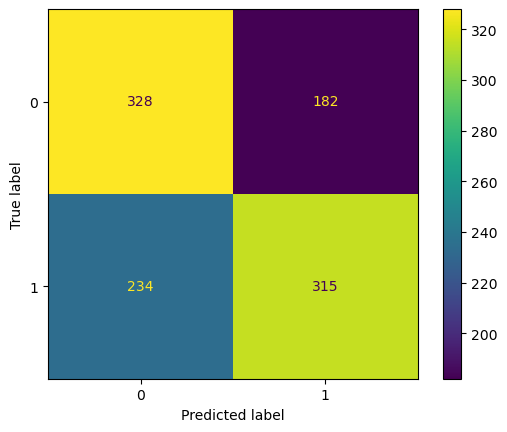

0.607176581680831
The AUC is equal to: 0.6391210400371441


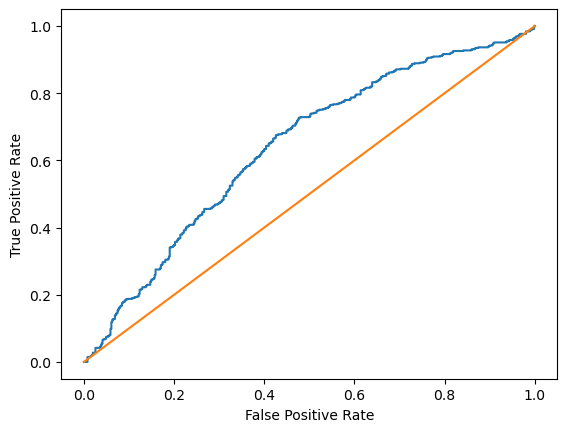

In [3]:
# perhaps logistic regressions might be good 
# Logistic Model 
logit = LogisticRegression()
logit.fit(x_train_scaled, y_train)
# confusion matrix:
cml = confusion_matrix(y_test, logit.predict(x_test_scaled))
displ = ConfusionMatrixDisplay(cml)
displ.plot()
plt.show()
# ROC curve + AUC score 
score1 = logit.score(x_test_scaled, y_test)
print(score1)
predictions_log = logit.predict_proba(x_test_scaled)
# Retrieve fpr, and tpr ~ we can graph ROC and 45 degree line with this
fpr_l,tpr_l,threshold_l = roc_curve(y_test, predictions_log[:,1])
plt.plot(fpr_l, tpr_l, fpr_l, fpr_l)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# AUC 
auc_log = roc_auc_score(y_test, predictions_log[:,1])
acc_l.append(score1)
auc_l.append(auc_log)
print('The AUC is equal to:', auc_log)

The AUC is equal to: 0.5439093484419264
The accuracy score is equal to: 0.544090860387871


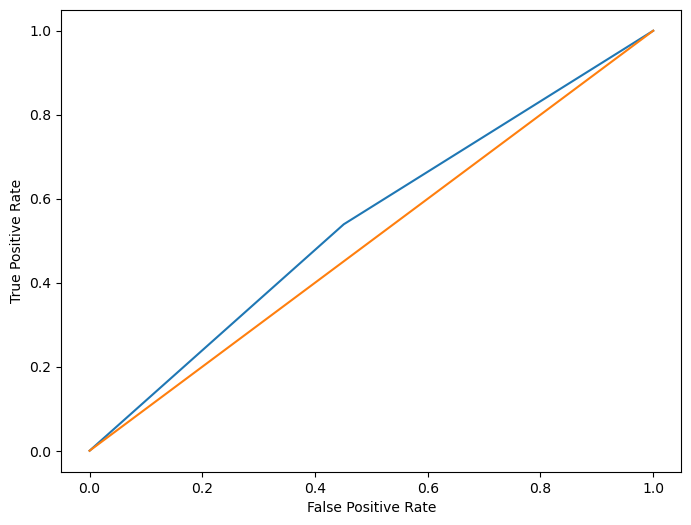

In [4]:
# Lets start off simple with a good old fashioned decision tree:
# Consider scaling the trade volumes?
tree_class = DecisionTreeClassifier()
d_tree = DecisionTreeClassifier(max_depth = 5)
clf = tree_class.fit(x_train_scaled, y_train)
# Accuracy Score
tree_score = tree_class.score(x_test_scaled, y_test)
plt.figure(figsize=(8,6))
# Create a tree plot

# ROC + AUC
predictions_tree = tree_class.predict_proba(x_test_scaled)
fpr_t,tpr_t,threshold_t = roc_curve(y_test, predictions_tree[:,1])
plt.plot(fpr_t, tpr_t, fpr_t, fpr_t)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# AUC 
auc_tree = roc_auc_score(y_test, predictions_tree[:,1])
acc_l.append(tree_score)
auc_l.append(auc_tree)
print('The AUC is equal to:', tree_score)
print('The accuracy score is equal to:', auc_tree)
# Predictions are almost as good as random ~ that is predicted outcomes for test data (introduced into our model)
# will only correctly predict the outcome around half of the time.

C:\Users\huang\AppData\Local\Temp\ipykernel_25792\2532163389.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_scaled, y_train)


0.5835694050991501
The AUC is equal to: 0.6115111253973355


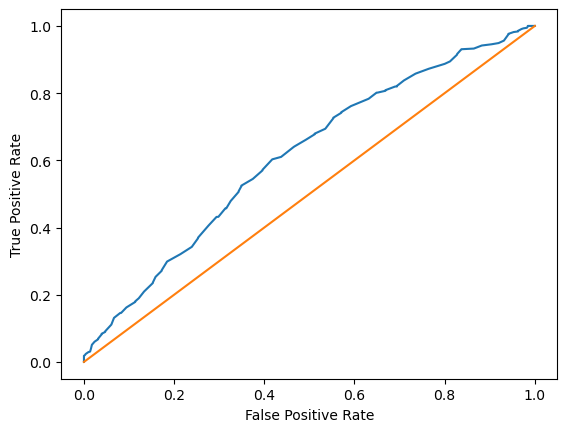

In [5]:
# We now go on to run a random forest
forest = RandomForestClassifier()
forest.fit(x_train_scaled, y_train)
forest_score = forest.score(x_test_scaled, y_test)
print(forest_score)
# ROC + AUC 
predictions_forest = forest.predict_proba(x_test_scaled)
fpr_f,tpr_f,threshold_f = roc_curve(y_test, predictions_forest[:,1])
plt.plot(fpr_f,tpr_f, fpr_f, fpr_f)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# AUC
auc_forest = roc_auc_score(y_test, predictions_forest[:,1])
acc_l.append(forest_score)
auc_l.append(auc_forest)
print('The AUC is equal to:', auc_forest)

C:\Users\huang\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6015108593012276
The AUC is equal to: 0.6368298867816709


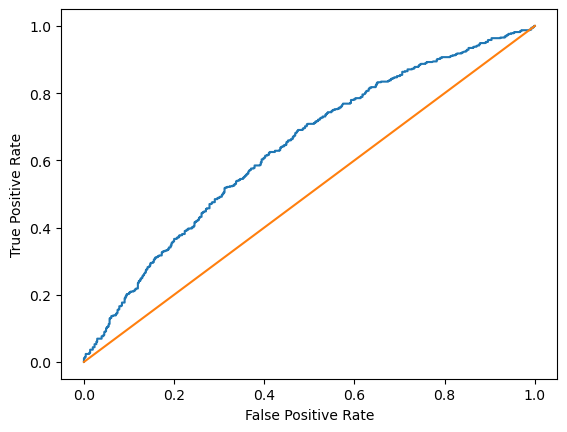

In [6]:
# Perhaps we could try gradient boosting decision trees?
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

GBC = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, 
                                 max_leaf_nodes = None, criterion = "squared_error")
# Make the fit?
GBC.fit(x_train_scaled, y_train)
gbc_score = GBC.score(x_test_scaled, y_test)
print(gbc_score)
# ROC + AUC 
predictions_boosted = GBC.predict_proba(x_test_scaled)
fpr_b,tpr_b,threshold_b = roc_curve(y_test, predictions_boosted[:,1])
plt.plot(fpr_b,tpr_b, fpr_b, fpr_b)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# AUC
auc_boosted = roc_auc_score(y_test, predictions_boosted[:,1])
acc_l.append(gbc_score)
auc_l.append(auc_boosted)
print('The AUC is equal to:', auc_boosted)

The AUC is equal to: 0.385379834994107


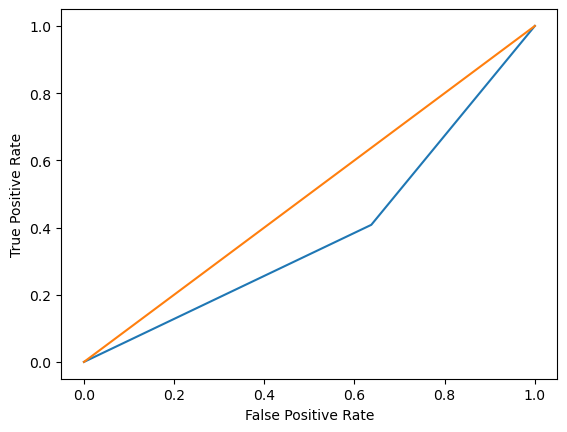

In [7]:
# Now do one for the persistence model ~ I think it would be around 0.5 AUC in that case it would mean 
# that indicators tend not to be affected by random walk?
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
total_trues = 0
for x,y in zip(x_test['Lagged Price Change Indicator'], y_test['Price Change Indicator']):
    yhat = model_persistence(x)
    predictions.append(yhat)
    if yhat == y:
        total_trues += 1
    else:
        pass
pers_score = total_trues/len(predictions)
# Accuracy Scores

# AUC
fpr_p,tpr_p,threshold_p = roc_curve(y_test, predictions)
plt.plot(fpr_p,tpr_p, fpr_p, fpr_p)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# AUC
auc_persistent = roc_auc_score(y_test, predictions)
acc_l.append(pers_score)
auc_l.append(auc_persistent) 
print('The AUC is equal to:', auc_persistent)
# Yikes this thing is worse than random ~ does it translate to random walk being worse in such a case
# This is interesting I suppose...

# Specifically for prices EMH may hold in the case of price indicators ~ we can't predict prices 
# but perhaps we can predict the direction of the price change? Direction of price change seems
# to not have random walk, unlike in prices...

C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

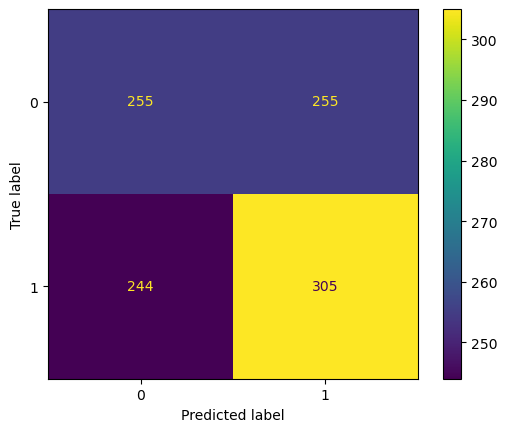

C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

The AUC is equal to: 0.5277777777777778


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

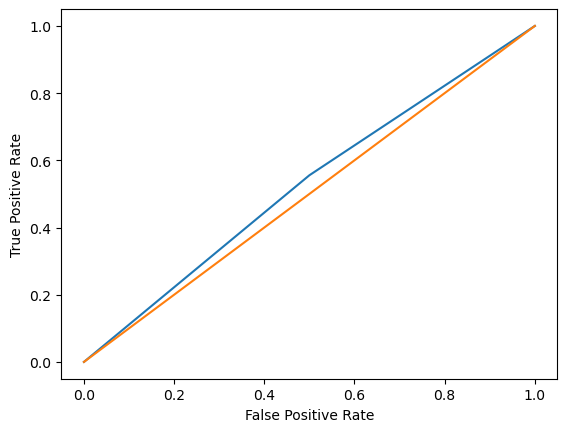

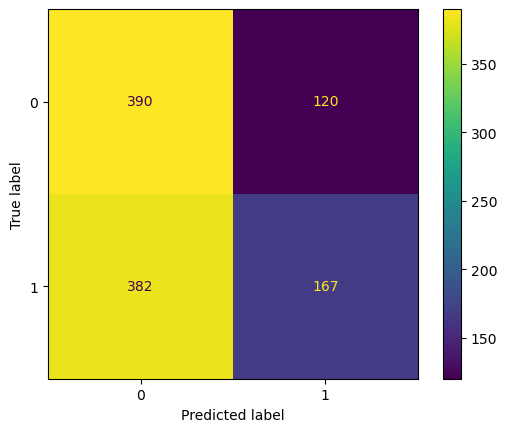

The AUC is equal to: 0.562934390513947


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

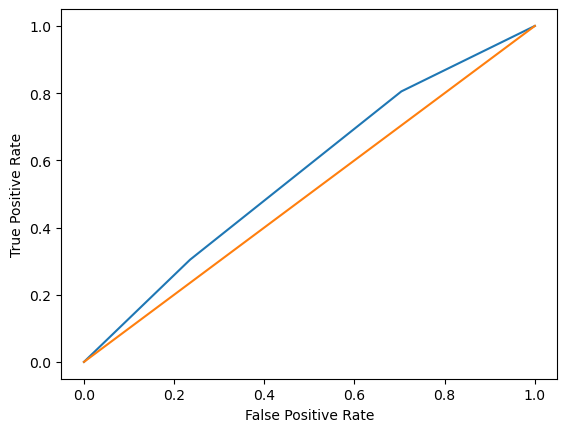

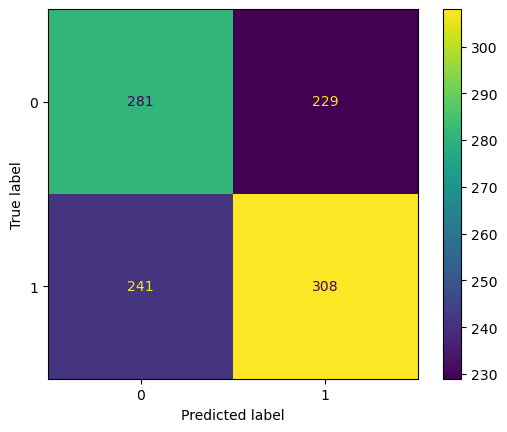

The AUC is equal to: 0.5676238437087039


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

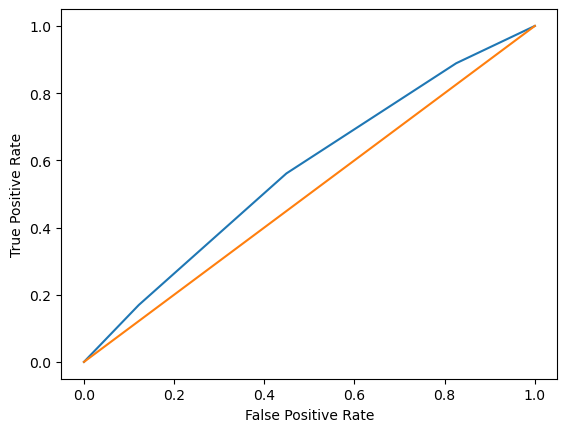

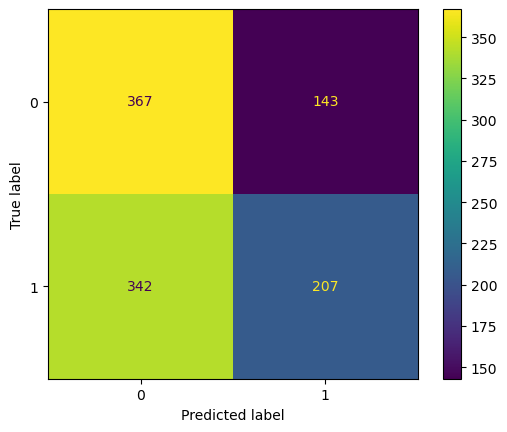

The AUC is equal to: 0.5735383406550234


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

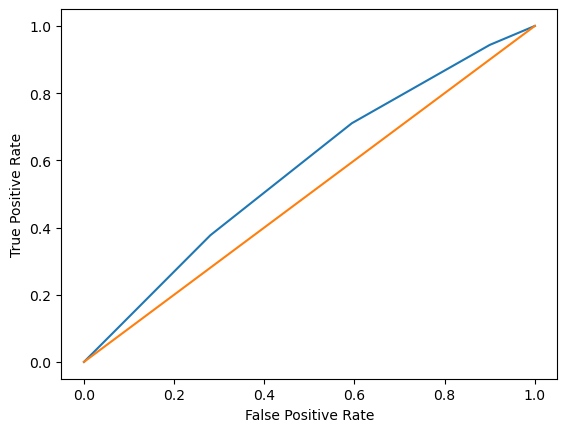

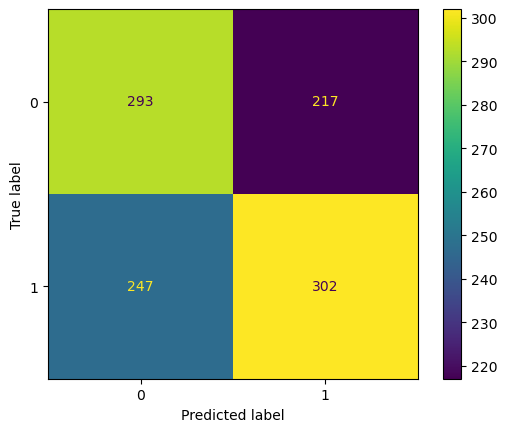

The AUC is equal to: 0.5772456159148541


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

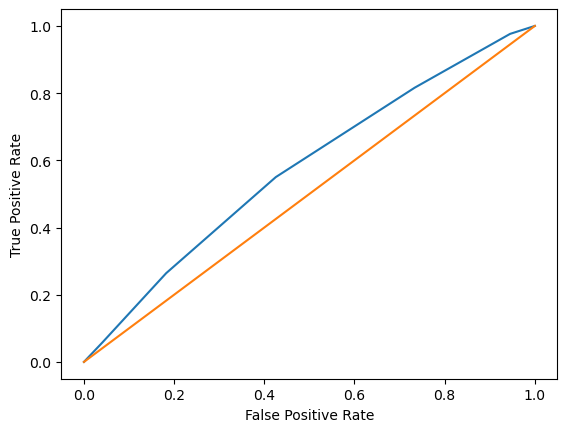

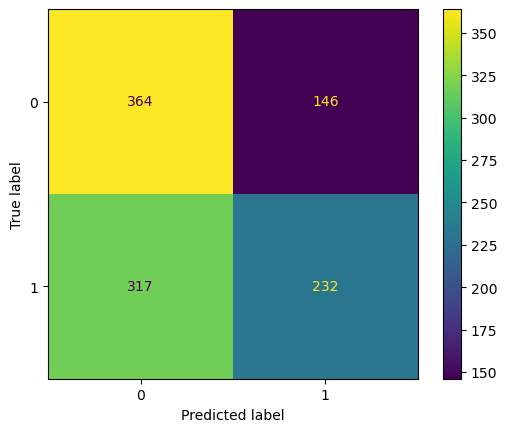

The AUC is equal to: 0.5851083967284547


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

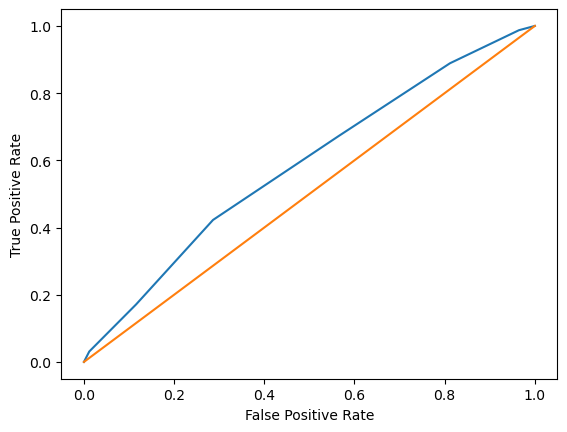

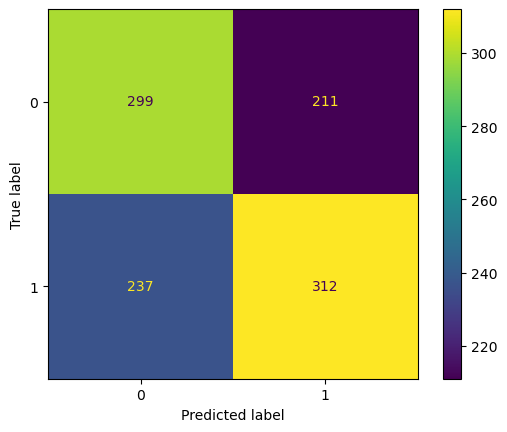

The AUC is equal to: 0.599580342155077


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

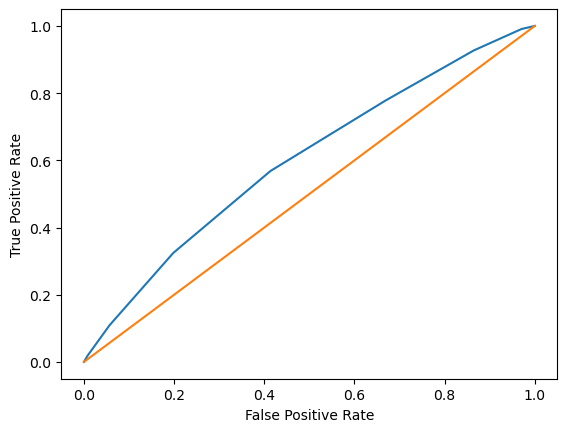

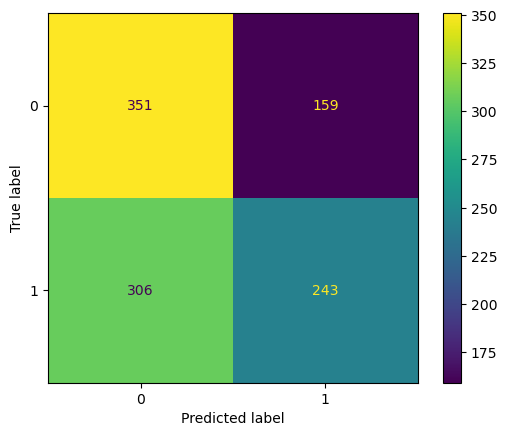

The AUC is equal to: 0.5959855709132469


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

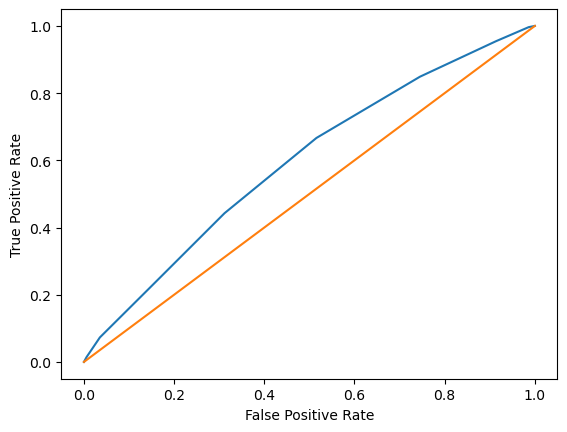

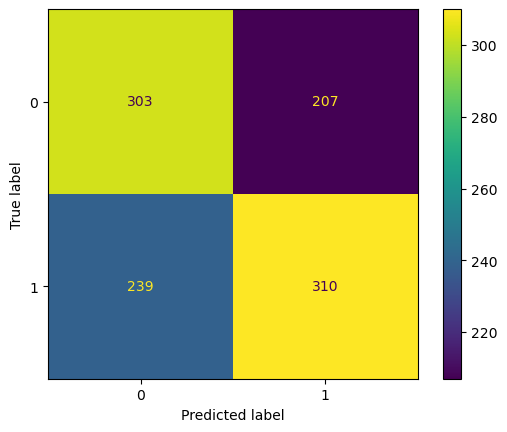

The AUC is equal to: 0.5971088253151897


C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

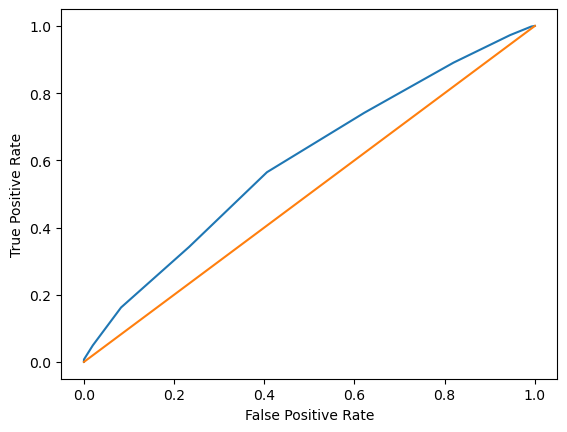

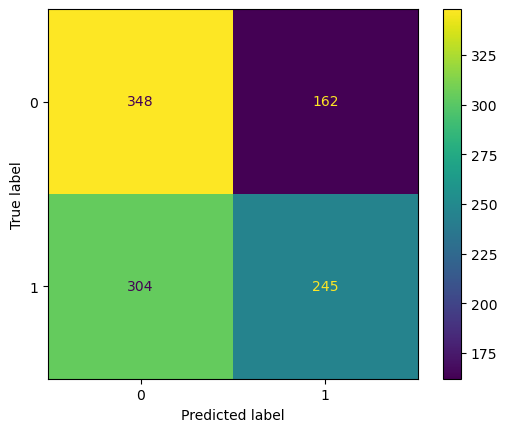

The AUC is equal to: 0.5953569770348941


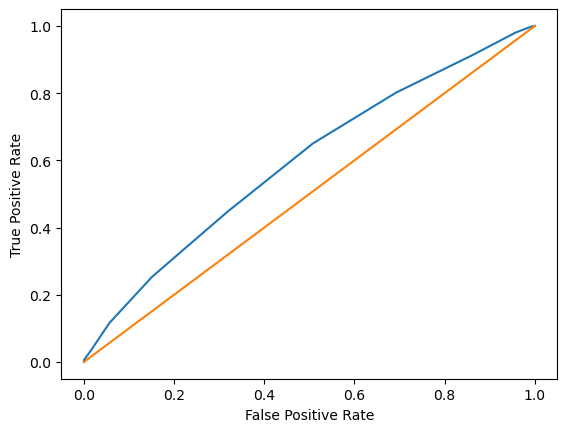

In [8]:
# Create a KNN model, hyperparameter tuning ~ we want to find the optimal # of neighbors
from sklearn.model_selection import cross_val_score
k_list = []
cv_l = []
acc_l1 = []
auc_l1 = []
ind_knn = 1
knn_df1 = scaler.transform(df[['Lagged Total Trade Volume', 'Lagged Total Trade volume Substitute 1',
                                                    'Lagged Total Trade volume Substitute 2', 
                                'Lagged Total Trade volume Substitute 3','Lagged Total Trade volume Substitute 4']])
knn_df2 = df[['Lagged Price Change Indicator', 'Lagged Price Change Indicator Substitute 1',
                           'Lagged Price Change Indicator Substitute 2', 'Lagged Price Change Indicator Substitute 3',
                           'Lagged Price Change Indicator Substitute 4']].to_numpy()
knn_df3 = np.concatenate((knn_df1, knn_df2), axis = 1)
knn_predicted = df[['Price Change Indicator']]
while ind_knn in range(11):
    # neighbor list
    k_list.append(ind_knn)
    KNN = KNeighborsClassifier(n_neighbors = ind_knn)
    KNN.fit(x_train_scaled, y_train)
    # accuracy score
    score = KNN.score(x_test_scaled, y_test)
    acc_l1.append(score)
    # cross validation 
    cross_val_scores = cross_val_score(KNN, knn_df3, knn_predicted, cv = 5)
    cross_val_mean = cross_val_scores.mean()
    cv_l.append(cross_val_mean)
    # Confusion Matrices
    cm = confusion_matrix(y_test, KNN.predict(x_test_scaled))
    disp = ConfusionMatrixDisplay(cm, display_labels = None)
    disp.plot()
    # auc and predictions:
    plt.show()
    predictions_knn = KNN.predict_proba(x_test_scaled)
    fpr_k,tpr_k,threshold_k = roc_curve(y_test, predictions_knn[:,1])
    plt.plot(fpr_k,tpr_k, fpr_k, fpr_k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    auc_knn = roc_auc_score(y_test, predictions_knn[:,1])
    auc_l1.append(auc_knn)
    print('The AUC is equal to:', auc_knn)
    ind_knn += 1 

In [9]:
knn_outcomes = pd.DataFrame(list(zip(k_list, cv_l, acc_l1, auc_l1)), columns = ['Number of Neighbors', 'CV Score', 'Accuracy Score',
                                                                             'AUC'])
knn_outcomes

,Number of Neighbors,CV Score,Accuracy Score,AUC
0,1,0.527931,0.528801,0.527778
1,2,0.531708,0.525968,0.562934
2,3,0.546620,0.556185,0.567624
3,4,0.536807,0.542021,0.573538
4,5,0.556057,0.561851,0.577246
5,6,0.554360,0.562795,0.585108
6,7,0.564363,0.576959,0.599580
7,8,0.564553,0.560907,0.595986
8,9,0.566249,0.578848,0.597109
9,10,0.560399,0.559962,0.595357


In [10]:
# get the maximum CV
ind_knn1 = 1
max_cv = knn_outcomes['CV Score'][ind_knn1]
while ind_knn1 in range(len(knn_outcomes['CV Score'])):
    if knn_outcomes['CV Score'][ind_knn1] > max_cv:
        max_cv = knn_outcomes['CV Score'][ind_knn1]
        max_ind = ind_knn1
    else:
        pass
    ind_knn1 += 1
acc_l.append(knn_outcomes['Accuracy Score'][max_ind])
auc_l.append(knn_outcomes['AUC'][max_ind]) 

In [11]:
# table for model results
model_outcomes_df = pd.DataFrame(list(zip(m_list, acc_l, auc_l)), columns = ['Model', 'Accuracy Score', 'AUC'])
model_outcomes_df

,Model,Accuracy Score,AUC
0,Logistic Regression,0.607177,0.639121
1,Decision Tree,0.543909,0.544091
2,Random Forest,0.583569,0.611511
3,Gradient Boosted Tree,0.601511,0.636830
4,Persistent Model,0.386213,0.385380
5,KNN,0.578848,0.597109
